In [1]:
#prepare data downloaded from UCL

import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)

In [2]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
heart_df.shape

(270, 14)

In [4]:
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [5]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [6]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")#suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert input to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0],1)

#split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y_label,test_size=0.2,random_state = 1)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)

#plt.plot(Xtrain)

Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

#plt.plot(Xtrain)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")




Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


# Let's start building the Neural Network 

In order to keep things relatively simple, you’re going to design and code a 2-layer neural network.

In [7]:

class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = float(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In summary, the hidden layer receives values from the input layer, calculates a weighted sum, adds the bias term, and then passes each result through an activation function—in our case a ReLU. The result from the ReLU is then passed to the output layer, where another weighted sum is performed using the second weights and biases. But then instead of passing the result through another activation function, it is passed through what I like to call the output function.
The output function will depend on what you’re trying to predict. You can use a sigmoid function when you have a two-class problem (binary classification), and you can use a function called softmax for multi-class problems.

In [8]:
nn = NeuralNet() # create the NN model
nn.fit(Xtrain, ytrain) #train the model

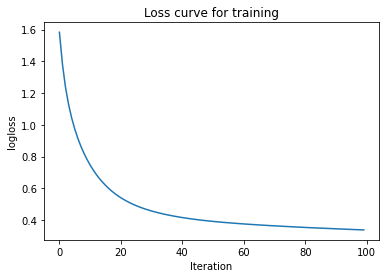

In [9]:
nn.plot_loss()

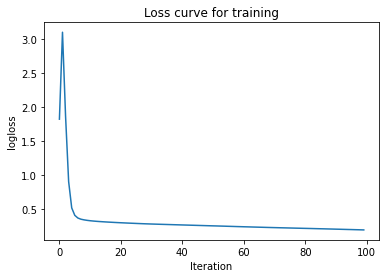

Train accuracy is 92.5925925925926
Test accuracy is 87.03703703703704


In [10]:
nn = NeuralNet(layers=[13,10,1], learning_rate=0.007, iterations=100) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

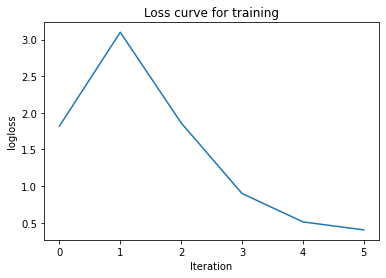

Train accuracy is 86.57407407407408
Test accuracy is 87.03703703703704


In [11]:
nn = NeuralNet(layers=[13,10,1], learning_rate=0.007, iterations=6) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

In [12]:
learning_rate = 0
Train_accuracy = 0
Test_accuracy = 0

for i in range(50):
    learning_rate = learning_rate+0.001
    nn = NeuralNet(layers=[13,10,1], learning_rate=learning_rate, iterations=i) # create the NN model
    nn.fit(Xtrain, ytrain) #train the model
#     nn.plot_loss()
#     print(i)
    train_pred = nn.predict(Xtrain)
    test_pred = nn.predict(Xtest)
    
    if Train_accuracy < nn.acc(ytrain, train_pred) and Test_accuracy < nn.acc(ytest, test_pred):
        Train_accuracy = nn.acc(ytrain, train_pred)
        Test_accuracy = nn.acc(ytest, test_pred)
        best_learning_rate = learning_rate
        best_iterations = i
        
    
print("Best Learning Rate is {}".format(best_learning_rate))
print("Best Iterations is {}".format(best_iterations))
print("Best Train Accuracy is {}".format(Train_accuracy))
print("Best Test Accuracy is {}".format(Test_accuracy))


Best Learning Rate is 0.007
Best Iterations is 6
Best Train Accuracy is 86.57407407407408
Best Test Accuracy is 87.03703703703704


# SkLearn

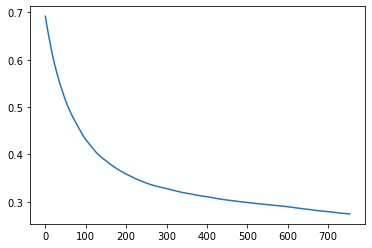

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

sknet = MLPClassifier(hidden_layer_sizes=(8), learning_rate_init=0.001, max_iter=1000)

sknet.fit(Xtrain,ytrain)

loss_values = sknet.loss_curve_

plt.plot(loss_values)

# Keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
# define the model
model = Sequential()
model.add(Dense(8, input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))


# compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(Xtrain, ytrain, epochs=100, verbose=0)
train_acc = model.evaluate(Xtrain, ytrain, verbose=0)[1]
test_acc = model.evaluate(Xtest, ytest, verbose=0)[1]

In [ ]:
model